# 实现混淆矩阵,召回率和精准率

In [39]:
import numpy as np
from sklearn import datasets

In [41]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(X, y)
poly_log = Pipeline([("Poly",PolynomialFeatures(2)), ("Standard", StandardScaler()), ("log", LogisticRegression())])
poly_log.fit(X_train, y_train)
poly_log.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9866666666666667

In [4]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9644444444444444

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9911111111111112

In [43]:
y[digits.target == 9] = 1
y[digits.target != 9] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [44]:
y_predict = log_reg.predict(X_test)

In [55]:
FP = sum((y_predict[y_predict == 1] == y_test[y_predict == 1]) == False)

In [56]:
TP = sum(y_predict[y_predict == 1] == y_test[y_predict == 1])

In [57]:
precision = TP / (TP+FP)
precision

0.9473684210526315

In [58]:
FN = sum((y_predict[y_predict == 0] == y_test[y_predict == 0]) == False)

In [59]:
recall = TP / (TP + FN)
recall

0.8

In [73]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

In [74]:
def confusion_matrix(y_true,y_predict):
    return np.array([[TN(y_true,y_predict), FP(y_true,y_predict)],[FN(y_true,y_predict), TP(y_true,y_predict)]])

In [75]:
confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [76]:
def precision_score(y_true,y_predict):
    try:
        return  TP(y_true,y_predict) / (TP(y_true,y_predict)+FP(y_true,y_predict))
    except:
        return 0

In [77]:
precision_score(y_test, y_predict)

0.9473684210526315

In [86]:
def recall_score(y_true,y_predict):
    try:
        return  TP(y_true,y_predict) / (TP(y_true,y_predict)+FN(y_true,y_predict))
    except:
        return 0

In [87]:
recall_score(y_test, y_predict)

0.8

In [88]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
knn_y_predict = knn.predict(X_test)

0.9977777777777778


In [89]:
precision_score(y_test, knn_y_predict)

1.0

In [90]:
recall_score(y_test, knn_y_predict)

0.9777777777777777

In [91]:
poly_log = Pipeline([("Poly",PolynomialFeatures(2)), ("Standard", StandardScaler()), ("log", LogisticRegression())])
poly_log.fit(X_train, y_train)
poly_y_predict = poly_log.predict(X_test)
precision_score(y_test, poly_y_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8775510204081632

In [92]:
recall_score(y_test, poly_y_predict)

0.9555555555555556

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [94]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

0.9473684210526315

In [95]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.8

In [98]:
from sklearn.metrics import f1_score
f1_score(y_test, poly_y_predict)

0.9148936170212767

In [101]:
def f1_score(y_true, y_predict):
    preci = precision_score(y_true, y_predict)
    recall = recall_score(y_true, y_predict)
    try:
        return 2 * preci * recall /(preci + recall) 
    except:
        return 0

In [102]:
f1_score(y_test, y_predict)

0.8674698795180723

In [103]:
decision_scores = log_reg.decision_function(X_test)

In [144]:
y_predict_2 = np.array(decision_scores >= -0.5, dtype = int)

In [145]:
confusion_matrix(y_test, y_predict_2)

array([[402,   3],
       [  9,  36]], dtype=int64)

In [146]:
f1_score(y_test, y_predict_2)

0.8571428571428571

# PR曲线

In [148]:
import matplotlib.pyplot as plt

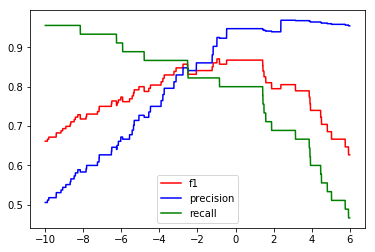

In [155]:
decision_line = np.linspace(-10,6,5000)
f1 = np.array([f1_score(y_test, np.array(decision_scores >= i, dtype = int)) for i in decision_line])
p = np.array([precision_score(y_test, np.array(decision_scores >= i, dtype = int)) for i in decision_line])
r = np.array([recall_score(y_test, np.array(decision_scores >= i, dtype = int)) for i in decision_line])
plt.plot(decision_line, f1, color = "red", label = "f1")
plt.plot(decision_line, p, color = "blue", label = "precision")
plt.plot(decision_line, r, color = "green", label = "recall")
plt.legend()
plt.show()

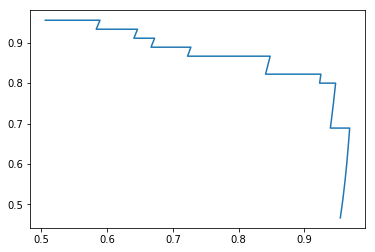

In [157]:
plt.plot(p,r)
plt.show()

In [159]:
from sklearn.metrics import precision_recall_curve
ps, rs, ts = precision_recall_curve(y_test, decision_scores)

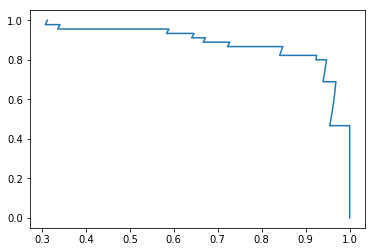

In [160]:
plt.plot(ps,rs)
plt.show()

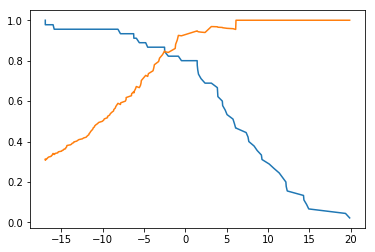

In [165]:
plt.plot(ts,rs[:-1])
plt.plot(ts,ps[:-1])
plt.show()

In [170]:
from MachineLearning.metrics import TPR,FPR
def TPR(y_true, y_predict):
    return recall_score(y_true, y_predict)

# ROC

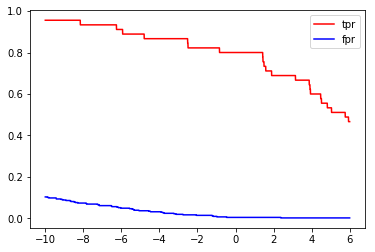

In [172]:
decision_line = np.linspace(-10,6,5000)
tpr = np.array([TPR(y_test, np.array(decision_scores >= i, dtype = int)) for i in decision_line])
fpr = np.array([FPR(y_test, np.array(decision_scores >= i, dtype = int)) for i in decision_line])
plt.plot(decision_line, tpr, color = "red", label = "tpr")
plt.plot(decision_line, fpr, color = "blue", label = "fpr")
plt.legend()
plt.show()

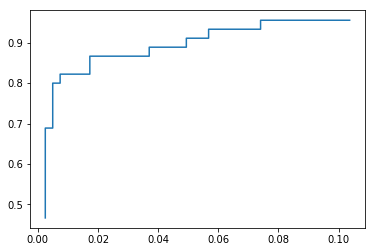

In [173]:
plt.plot(fpr,tpr)
plt.show()

In [174]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, decision_scores)

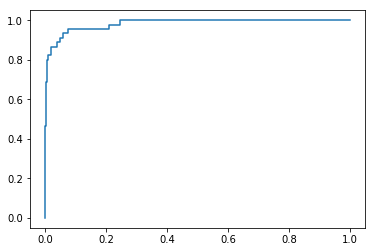

In [175]:
plt.plot(fpr, tpr)

In [176]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.9830452674897119

In [177]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
from sklearn.metrics import precision_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
precision_score(y_test, y_predict, average= "micro")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9555555555555556

In [178]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average= "micro")

0.9555555555555556

In [179]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict, average= "micro")

0.9555555555555556

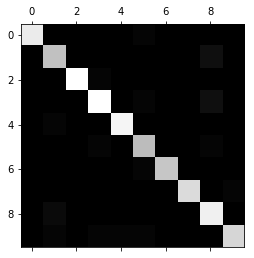

In [181]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm , cmap = plt.cm.gray)

In [185]:
row_sums = np.sum(cfm, axis=1)
erro_matrix = cfm / row_sums
np.fill_diagonal(erro_matrix, 0)

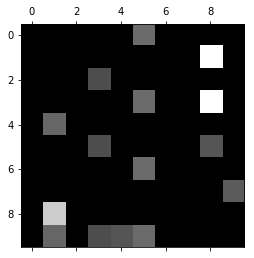

In [186]:
plt.matshow(erro_matrix , cmap = plt.cm.gray)